In [1]:
import pandas as pd

boston = pd.read_csv("BostonHousing.csv")
boston.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,23.1
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86,22.5
38,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279,19.2,393.43,10.13,24.7
56,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7
114,0.14231,0.0,10.01,0,0.547,6.254,84.2,2.2565,6,432,17.8,388.74,10.45,18.5


In [2]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [3]:
X = boston.drop(columns=['medv'])
y = boston['medv']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()

model.add(Dense(128, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [7]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 5ms/step - loss: 581.6877
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 490.8996
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 292.7958
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 107.8808
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 56.3124
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 36.6893
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 27.9973
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 24.2089
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 21.0441
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 19.2736
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 17.6526
Epoch 12/100
13/13 [==============================] - 0s 5ms/step - loss: 16.4994
Epoch 13/100
13/13 [=

In [8]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [9]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
r2 = r2_score(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:   ", r2)
print("RMSE: ", rmse)

R2:    0.8483754779033217
RMSE:  3.3345464197136927


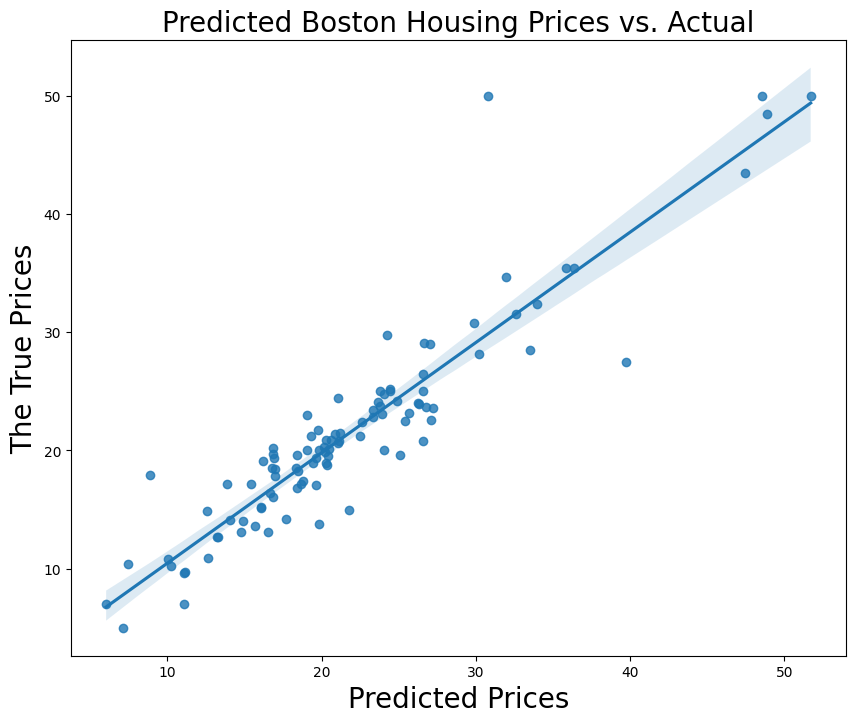

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.regplot(x=y_pred, y=y_test, data=boston)
plt.axis('tight')
plt.ylabel('The True Prices', fontsize=20)

plt.xlabel('Predicted Prices', fontsize=20)
plt.title("Predicted Boston Housing Prices vs. Actual", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()